# Readme

* Predict car prices
* Dataset src: imports-85 (https://archive.ics.uci.edu/ml/datasets/automobile)
* Uses only train/test for validation

# Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

pd.options.display.max_columns = 99

# Get the data

In [2]:
all_columns = [
    'symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style'
    , 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type'
    , 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower'
    , 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'
]

cars = pd.read_csv('../data/imports-85.data',  names=all_columns)


cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## get relevant columns

In [3]:
relevant_columns = [
    'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight'
    , 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower'
    , 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'
]


target_column = 'price'
numeric_cars = cars[relevant_columns]

# Clean the data

In [4]:
# replace ? with nan
numeric_cars.replace("?", np.nan, inplace=True)
numeric_cars = numeric_cars.astype('float')
numeric_cars.head()

C:\Users\bosale\AppData\Local\Continuum\anaconda3\envs\data-science-general\lib\site-packages\pandas\core\frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


## Handle nulls
* drop normalized-losses
* replace other columns with their mean
* remove rows where price is missing

In [5]:
# these columns have nulls
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
# fill missing values with their mean
numeric_cars = numeric_cars[~numeric_cars[target_column].isna()]
"""
columns_with_nulls = [
    'bore'
    , 'stroke'
    , 'horsepower'
    , 'peak-rpm'
]
for col in columns_with_nulls:
    cars.loc[(cars[col].isnull()), col] = cars[~cars[col].isnull()][col].astype(float).mean()
""" 
    
# better way from here: https://github.com/dataquestio/solutions/blob/master/Mission155Solutions.ipynb
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

print(numeric_cars.shape)

(201, 15)


In [7]:
# all values are now filled
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## Normalize
* Only features, i. e. not the target column

In [8]:
# Variante von dataquest
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col
numeric_cars.describe()




numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


# Univariates Modell für jedes Feature und testing mittels train/test

In [52]:
def knn_train_test(feature, target_column, data, k):
    # train_df, test_df = train_test_split(numeric_cars, random_state = 1, test_size=0.5, shuffle=True)
    
    # get train/test-data
    # Variante von dataquest
    np.random.seed(1)

    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(data.index)
    rand_df = data.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)

    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]

    
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[[feature]], train_df[target_column])
    predictions = knn.predict(test_df[[feature]])
        
    return mean_squared_error(test_df[[target_column]], predictions, squared=False)

In [65]:
# get features for looping
features = numeric_cars.columns.tolist()
features.remove(target_column)

error_univariate = pd.DataFrame()
neighbors = [1, 3, 5, 7, 9]

for idx, feature in enumerate(features):
    errors_feature = pd.DataFrame()
    
    for k_idx, k in enumerate(neighbors):
        errors_feature.loc[k_idx, 'rmse'] = knn_train_test(feature, target_column, numeric_cars, k)
        errors_feature.loc[k_idx, 'feature'] = feature
        errors_feature.loc[k_idx, 'k'] = k
    error_univariate = error_univariate.append(errors_feature)
        
error_univariate.sort_values(by=['feature', 'rmse', 'k'], ascending=True, inplace=True)

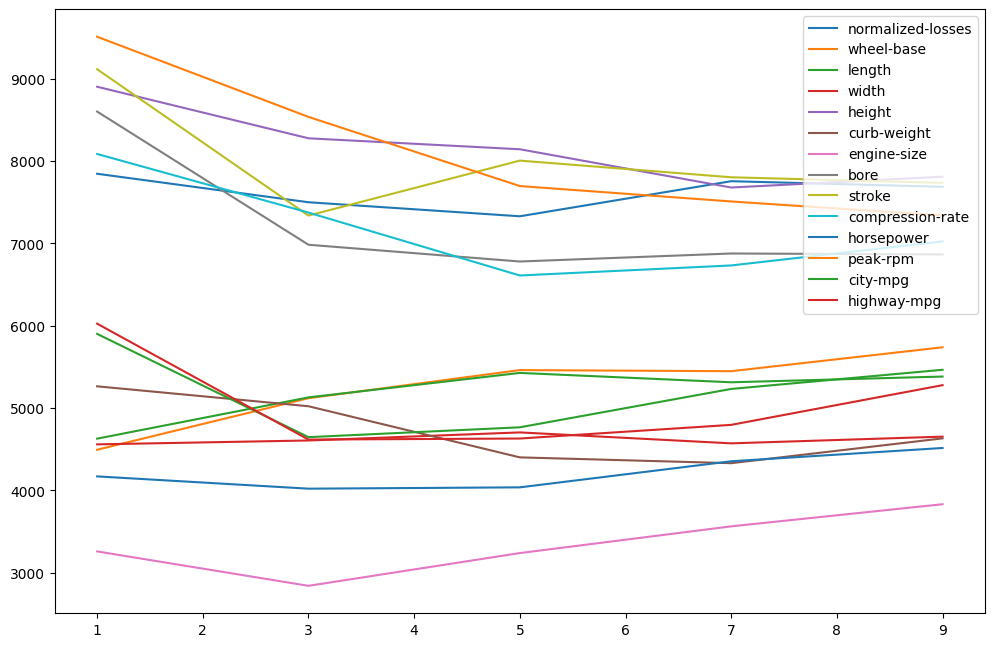

In [66]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

for idx, feature in enumerate(features):
    subset = error_univariate[error_univariate['feature']==feature].copy()
    subset.sort_values(by=['k'], ascending=True, inplace=True)
    
    plt.plot(subset['k'], subset['rmse'], label=feature)
    plt.legend(loc='upper right')
    # Display a figure.
plt.show()

# Multivariates Modell mit Hyperparameter-Tuning für k und Evaluierung mittels train/test
* Features basierend auf den top Features der univariaten Variante (max je feature oder mean nehmen)
* top 2 bis top 5 features

In [104]:
def get_top_n_features(error_df, n, algo='grouped'):
    
    if algo == 'grouped':
        top_features = error_df[
            ['rmse', 'feature']
        ].groupby(by='feature').min().reset_index().sort_values(by='rmse')['feature'][0:n].tolist()
    else:
        top_features = error_univariate[
            ['rmse', 'feature']
        ].groupby(by='feature').mean().reset_index().sort_values(by='rmse')['feature'][0:n].tolist()
    
    return top_features
    # alternative

## Get the data

In [125]:
train_data, test_data = train_test_split(numeric_cars, train_size = 0.5, random_state=1, shuffle=False)

print(train_data.shape)

print(test_data.shape)



# like dataquest
df = numeric_cars.copy()
np.random.seed(1)

# Randomize order of rows in data frame.
shuffled_index = np.random.permutation(df.index)
rand_df = df.reindex(shuffled_index)

# Divide number of rows in half and round.
last_train_row = int(len(rand_df) / 2)

# Select the first half and set as training set.
# Select the second half and set as test set.
train_data = rand_df.iloc[0:last_train_row]
test_data = rand_df.iloc[last_train_row:]

(100, 15)
(101, 15)


## Train the model across top features and k = 5

In [166]:
feature_ranking = [2, 3, 4, 5, 6]
number_neighbors = [x for x in range(5, 6)]
feature_column_sep = '##'

In [167]:
errors_multivar = pd.DataFrame()

for feature_rank in feature_ranking:
    errors_feature = pd.DataFrame()
    
    features = get_top_n_features(error_univariate, feature_rank, algo='man')
    
    for k_idx, k in enumerate(number_neighbors):
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_data[features], train_data[[target_column]])
        predictions = knn.predict(test_data[features])
    
        errors_feature.loc[k_idx, 'rmse'] = mean_squared_error(test_data[[target_column]], predictions, squared=False)
        errors_feature.loc[k_idx, 'features'] = feature_column_sep.join(features)
        errors_feature.loc[k_idx, 'k'] = k
        errors_feature.loc[k_idx, 'number_features'] = feature_rank
    
    errors_multivar = errors_multivar.append(errors_feature)
    errors_multivar.reset_index(drop=True, inplace=True)

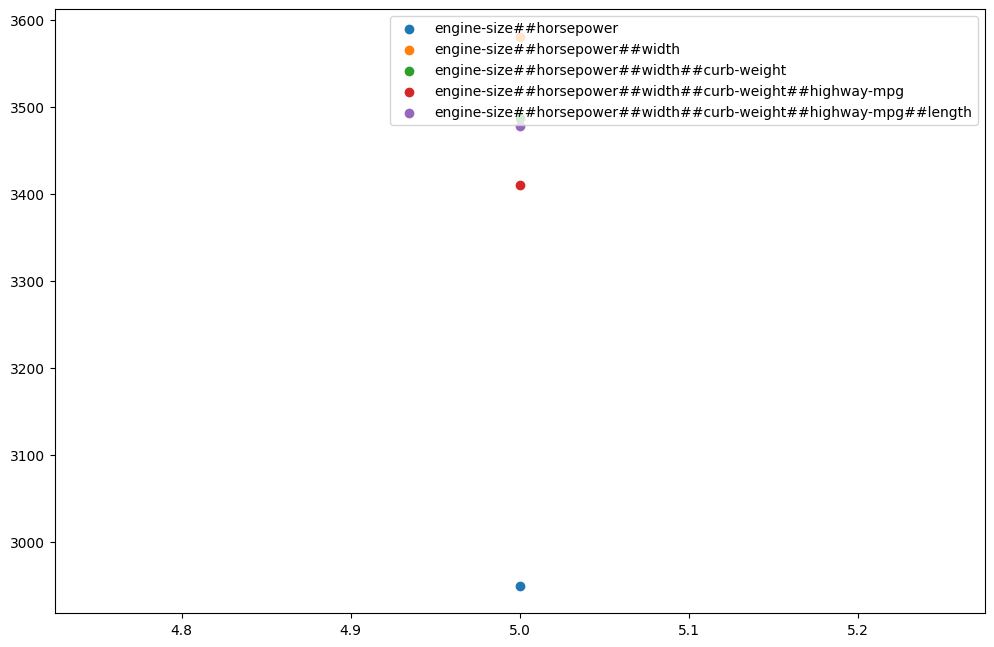

In [168]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
feature_concat_names = errors_multivar.features.unique().tolist()
x_values = errors_multivar.k.unique().tolist()

for _ in feature_concat_names:
    y_values = errors_multivar.loc[(errors_multivar['features']==_), 'rmse']
    if len(x_values) == 1:
        plt.scatter(x_values, y_values, label=_)
    else:
        plt.plot(x_values, y_values, label=_)
plt.legend(loc='upper right')
plt.show()

## Train multivariate model based on top previous model and grid search for k from 1 to 25

In [194]:
# get top features from previous multivar-model
def get_top_features_from_multivar(top_n):
    features = errors_multivar.sort_values(
        by=['rmse'], ascending=True).reset_index(drop=True).loc[top_n, 'features'].split(feature_column_sep)
    print('using features: ', features)
    
    return features

In [195]:
features = get_top_features_from_multivar(3)

using features:  ['engine-size', 'horsepower', 'width', 'curb-weight']


In [197]:
number_neighbors = [x for x in range(1, 26)]
errors_multivar_hyperparamt = pd.DataFrame()

multivar_features = errors_multivar.features.unique().tolist()

for feature_combination in multivar_features:
    features = feature_combination.split(feature_column_sep)
    print('using features: ', features)
    errors_feature = pd.DataFrame()
    
    for k_idx, k in enumerate(number_neighbors):
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[features], train_df[[target_column]])
        predictions = knn.predict(test_df[features])

        errors_feature.loc[k_idx, 'rmse'] = mean_squared_error(test_df[target_column], predictions, squared=False)
        errors_feature.loc[k_idx, 'k'] = k
        errors_feature.loc[k_idx, 'features'] = feature_column_sep.join(features)
    errors_multivar_hyperparamt = errors_multivar_hyperparamt.append(errors_feature)

using features:  ['engine-size', 'horsepower']
using features:  ['engine-size', 'horsepower', 'width']
using features:  ['engine-size', 'horsepower', 'width', 'curb-weight']
using features:  ['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg']
using features:  ['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg', 'length']


In [198]:
errors_multivar_hyperparamt

,rmse,k,features
0,2783.620424,1.0,engine-size##horsepower
1,2657.796381,2.0,engine-size##horsepower
2,2792.586573,3.0,engine-size##horsepower
3,2891.532969,4.0,engine-size##horsepower
4,2949.881728,5.0,engine-size##horsepower
...,...,...,...
20,4815.490735,21.0,engine-size##horsepower##width##curb-weight##h...
21,4867.419974,22.0,engine-size##horsepower##width##curb-weight##h...
22,4933.192530,23.0,engine-size##horsepower##width##curb-weight##h...
23,4948.357240,24.0,engine-size##horsepower##width##curb-weight##h...


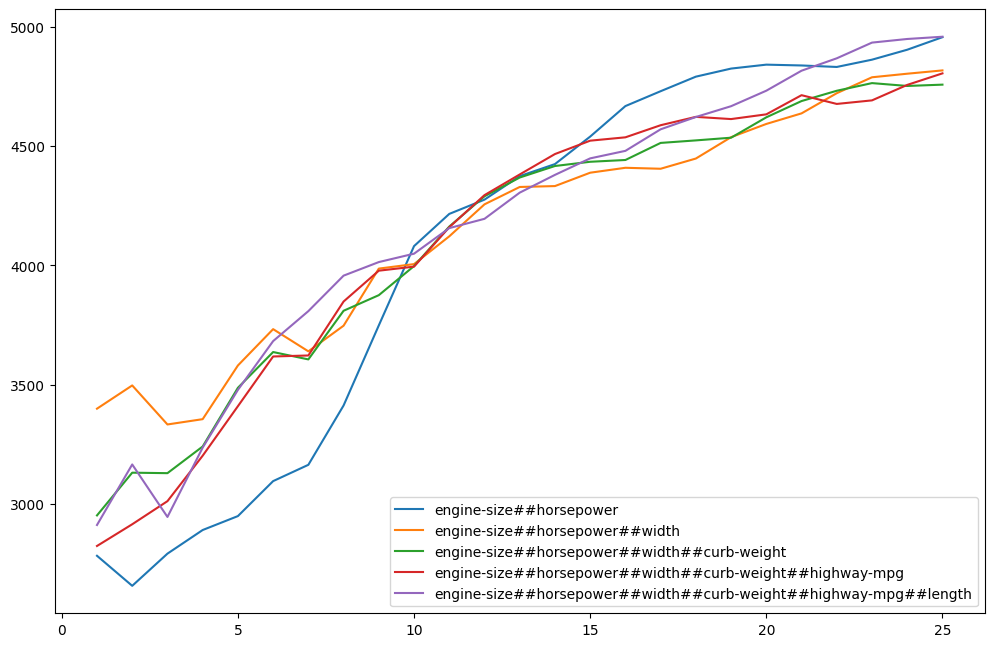

In [210]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

data_viz = errors_multivar_hyperparamt.copy()
for _ in errors_multivar_hyperparamt.features.unique().tolist():
    plt.plot(
        data_viz.k.unique().tolist()
        , data_viz.loc[data_viz['features']==_, 'rmse']
        , label=_
    )
plt.legend()